In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 42 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (18.5 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falli

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np


In [3]:
data = pd.read_csv('/content/drive/MyDrive/경경대 학술제/data/data2.csv', encoding = 'cp949')
data

,Unnamed: 0,자치구,동,자치구_동,경상자수,중상자수,사망자수,부상신고자수,인구수,1인가구,면적,도로면적,교차로,단일로,횡단보도개수,교차로개수
0,0,강남구,개포동,강남구 개포동,30.0,19.0,0.0,5.0,51732,3888,5.27,1.242666,34.0,13.0,363,33
1,1,강남구,논현동,강남구 논현동,113.0,40.0,0.0,14.0,45731,11739,2.72,0.641376,53.0,74.0,910,35
2,2,강남구,대치동,강남구 대치동,88.0,34.0,1.0,31.0,83418,6426,3.52,0.830016,62.0,60.0,940,58
3,3,강남구,도곡동,강남구 도곡동,52.0,19.0,0.0,8.0,56269,3280,2.04,0.481032,36.0,29.0,432,36
4,4,강남구,삼성동,강남구 삼성동,53.0,33.0,0.0,13.0,43968,5669,3.18,0.749844,32.0,47.0,888,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,180,중랑구,면목동,중랑구 면목동,210.0,75.0,0.0,51.0,107854,15833,5.17,1.344717,133.0,118.0,1238,90
181,181,중랑구,묵동,중랑구 묵동,49.0,24.0,0.0,12.0,55260,6790,1.87,0.486387,39.0,25.0,588,46
182,182,중랑구,상봉동,중랑구 상봉동,53.0,38.0,0.0,15.0,45126,7686,1.53,0.397953,45.0,41.0,615,23
183,183,중랑구,신내동,중랑구 신내동,32.0,13.0,1.0,13.0,61133,4699,3.49,0.907749,31.0,22.0,646,58


In [4]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
data['사고건수'] = data['경상자수']+data['중상자수']+data['부상신고자수']

In [6]:
data.rename(columns = {'교차로' : '교차로사고', '단일로' : '단일로사고'}, inplace=True)
data

,자치구,동,자치구_동,경상자수,중상자수,사망자수,부상신고자수,인구수,1인가구,면적,도로면적,교차로사고,단일로사고,횡단보도개수,교차로개수,사고건수
0,강남구,개포동,강남구 개포동,30.0,19.0,0.0,5.0,51732,3888,5.27,1.242666,34.0,13.0,363,33,54.0
1,강남구,논현동,강남구 논현동,113.0,40.0,0.0,14.0,45731,11739,2.72,0.641376,53.0,74.0,910,35,167.0
2,강남구,대치동,강남구 대치동,88.0,34.0,1.0,31.0,83418,6426,3.52,0.830016,62.0,60.0,940,58,153.0
3,강남구,도곡동,강남구 도곡동,52.0,19.0,0.0,8.0,56269,3280,2.04,0.481032,36.0,29.0,432,36,79.0
4,강남구,삼성동,강남구 삼성동,53.0,33.0,0.0,13.0,43968,5669,3.18,0.749844,32.0,47.0,888,43,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,중랑구,면목동,중랑구 면목동,210.0,75.0,0.0,51.0,107854,15833,5.17,1.344717,133.0,118.0,1238,90,336.0
181,중랑구,묵동,중랑구 묵동,49.0,24.0,0.0,12.0,55260,6790,1.87,0.486387,39.0,25.0,588,46,85.0
182,중랑구,상봉동,중랑구 상봉동,53.0,38.0,0.0,15.0,45126,7686,1.53,0.397953,45.0,41.0,615,23,106.0
183,중랑구,신내동,중랑구 신내동,32.0,13.0,1.0,13.0,61133,4699,3.49,0.907749,31.0,22.0,646,58,58.0


In [7]:
# 필요 패키지 불러오기 (KMeans, matplotlib, preprocessing)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import preprocessing


참고 :  https://lucy-the-marketer.kr/ko/growth/k-means-clustering-python-customer-data-analysis/

In [8]:
# 원본 데이터를 복사해서 전처리하기
processed_data = data.copy()

# 데이터 전처리 - 정규화를 위한 작업
scaler = preprocessing.MinMaxScaler()
var_list = ['교차로사고', '단일로사고','횡단보도개수','교차로개수','인구수', '1인가구','사고건수']

processed_data[var_list] = scaler.fit_transform(processed_data[var_list])
data_proc = processed_data.drop(['자치구','동','경상자수','중상자수','부상신고자수','면적','도로면적','사망자수'],axis=1)
data_proc

,자치구_동,인구수,1인가구,교차로사고,단일로사고,횡단보도개수,교차로개수,사고건수
0,강남구 개포동,0.238831,0.140551,0.216561,0.100775,0.166267,0.182353,0.151261
1,강남구 논현동,0.209475,0.455106,0.337580,0.573643,0.428366,0.194118,0.467787
2,강남구 대치동,0.393831,0.242237,0.394904,0.465116,0.442741,0.329412,0.428571
3,강남구 도곡동,0.261025,0.116191,0.229299,0.224806,0.199329,0.200000,0.221289
4,강남구 삼성동,0.200851,0.211908,0.203822,0.364341,0.417825,0.241176,0.277311
...,...,...,...,...,...,...,...,...
180,중랑구 면목동,0.513367,0.619135,0.847134,0.914729,0.585529,0.517647,0.941176
181,중랑구 묵동,0.256089,0.256821,0.248408,0.193798,0.274078,0.258824,0.238095
182,중랑구 상봉동,0.206516,0.292720,0.286624,0.317829,0.287015,0.123529,0.296919
183,중랑구 신내동,0.284818,0.173044,0.197452,0.170543,0.301869,0.329412,0.162465


In [9]:
data_proc.set_index(['자치구_동'],inplace=True)
data_proc

,인구수,1인가구,교차로사고,단일로사고,횡단보도개수,교차로개수,사고건수
자치구_동,,,,,,,
강남구 개포동,0.238831,0.140551,0.216561,0.100775,0.166267,0.182353,0.151261
강남구 논현동,0.209475,0.455106,0.337580,0.573643,0.428366,0.194118,0.467787
강남구 대치동,0.393831,0.242237,0.394904,0.465116,0.442741,0.329412,0.428571
강남구 도곡동,0.261025,0.116191,0.229299,0.224806,0.199329,0.200000,0.221289
강남구 삼성동,0.200851,0.211908,0.203822,0.364341,0.417825,0.241176,0.277311
...,...,...,...,...,...,...,...
중랑구 면목동,0.513367,0.619135,0.847134,0.914729,0.585529,0.517647,0.941176
중랑구 묵동,0.256089,0.256821,0.248408,0.193798,0.274078,0.258824,0.238095
중랑구 상봉동,0.206516,0.292720,0.286624,0.317829,0.287015,0.123529,0.296919


In [10]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data_proc)
    distortions.append(kmeanModel.inertia_)

In [11]:
distortions

[42.09285846715403,
 20.09298524894568,
 13.506550013873273,
 10.707068081331,
 9.420688387702729,
 8.146176526254214,
 7.4011510696491465,
 6.893985324120823,
 6.4044925175098975]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44400 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45236 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52509 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_

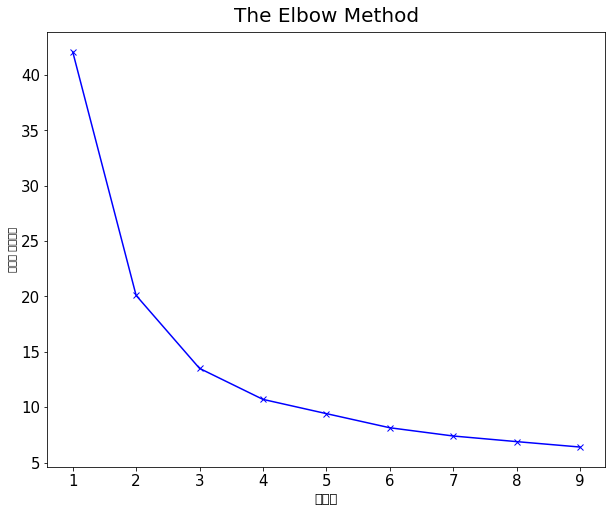

In [12]:
plt.figure(figsize=(10,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('군집수',fontsize=13)
plt.ylabel('군집내 총제곱합')
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('The Elbow Method',fontsize=20,pad=10)
plt.show()

3개의 군집으로 군집화

In [13]:
k = 3

# 그룹 수, random_state 설정
kmeans_model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
kmeans_model.fit(data_proc)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
data_proc['cluster'] = kmeans_model.fit_predict(data_proc)

In [14]:
data_proc

,인구수,1인가구,교차로사고,단일로사고,횡단보도개수,교차로개수,사고건수,cluster
자치구_동,,,,,,,,
강남구 개포동,0.238831,0.140551,0.216561,0.100775,0.166267,0.182353,0.151261,1
강남구 논현동,0.209475,0.455106,0.337580,0.573643,0.428366,0.194118,0.467787,2
강남구 대치동,0.393831,0.242237,0.394904,0.465116,0.442741,0.329412,0.428571,2
강남구 도곡동,0.261025,0.116191,0.229299,0.224806,0.199329,0.200000,0.221289,1
강남구 삼성동,0.200851,0.211908,0.203822,0.364341,0.417825,0.241176,0.277311,2
...,...,...,...,...,...,...,...,...
중랑구 면목동,0.513367,0.619135,0.847134,0.914729,0.585529,0.517647,0.941176,0
중랑구 묵동,0.256089,0.256821,0.248408,0.193798,0.274078,0.258824,0.238095,2
중랑구 상봉동,0.206516,0.292720,0.286624,0.317829,0.287015,0.123529,0.296919,2


In [15]:
data_cluster = data_proc.reset_index()
data_cluster.head()

,자치구_동,인구수,1인가구,교차로사고,단일로사고,횡단보도개수,교차로개수,사고건수,cluster
0,강남구 개포동,0.238831,0.140551,0.216561,0.100775,0.166267,0.182353,0.151261,1
1,강남구 논현동,0.209475,0.455106,0.337580,0.573643,0.428366,0.194118,0.467787,2
2,강남구 대치동,0.393831,0.242237,0.394904,0.465116,0.442741,0.329412,0.428571,2
3,강남구 도곡동,0.261025,0.116191,0.229299,0.224806,0.199329,0.200000,0.221289,1
4,강남구 삼성동,0.200851,0.211908,0.203822,0.364341,0.417825,0.241176,0.277311,2


In [ ]:
# 군집 0 - 15개
cluster0=data_cluster[data_cluster.cluster==0]
cluster0.자치구_동.unique()

array(['강남구 역삼동', '강북구 미아동', '강북구 수유동', '강서구 화곡동', '관악구 신림동', '구로구 구로동',
       '금천구 독산동', '노원구 상계동', '서초구 서초동', '송파구 잠실동', '양천구 목동', '양천구 신월동',
       '양천구 신정동', '영등포구 신길동', '중랑구 면목동'], dtype=object)

In [ ]:
# 군집 1 - 114개
cluster1=data_cluster[data_cluster.cluster==1]
cluster1.자치구_동.unique()

array(['강남구 개포동', '강남구 도곡동', '강남구 세곡동', '강남구 수서동', '강남구 신사동', '강남구 압구정동',
       '강남구 일원동', '강남구 청담동', '강동구 고덕동', '강동구 둔촌동', '강동구 명일동', '강동구 상일동',
       '강북구 우이동', '강서구 공항동', '강서구 염창동', '관악구 남현동', '광진구 광장동', '광진구 군자동',
       '광진구 능동', '광진구 화양동', '구로구 가리봉동', '구로구 고척동', '구로구 신도림동', '구로구 항동',
       '노원구 하계동', '도봉구 도봉동', '동대문구 이문동', '동대문구 제기동', '동대문구 청량리동',
       '동대문구 회기동', '동대문구 휘경동', '동작구 대방동', '동작구 상도1동', '동작구 신대방동',
       '동작구 흑석동', '마포구 공덕동', '마포구 대흥동', '마포구 도화동', '마포구 망원동', '마포구 상암동',
       '마포구 신수동', '마포구 아현동', '마포구 연남동', '마포구 염리동', '마포구 용강동', '마포구 합정동',
       '서대문구 남가좌동', '서대문구 북가좌동', '서대문구 북아현동', '서대문구 신촌동', '서대문구 충현동',
       '서대문구 홍은동', '서대문구 홍제동', '서초구 내곡동', '서초구 잠원동', '성동구 금호동', '성동구 마장동',
       '성동구 사근동', '성동구 송정동', '성동구 옥수동', '성동구 용답동', '성동구 응봉동', '성동구 행당동',
       '성북구 길음동', '성북구 돈암동', '성북구 동선동', '성북구 보문동', '성북구 삼선동', '성북구 석관동',
       '성북구 성북동', '성북구 안암동', '성북구 종암동', '송파구 거여동', '송파구 마천동', '송파구 삼전동',
       '송파구 석촌동', '송파구 오금동', '송파구 장지동', '송파구 풍납동', '영등포구 도림동', '용

In [ ]:
# 군집 2 - 56개
cluster2=data_cluster[data_cluster.cluster==2]
cluster2.자치구_동.unique()

array(['강남구 논현동', '강남구 대치동', '강남구 삼성동', '강동구 길동', '강동구 성내동', '강동구 암사동',
       '강동구 천호동', '강북구 번동', '강서구 가양동', '강서구 등촌동', '강서구 방화동', '광진구 구의동',
       '광진구 자양동', '광진구 중곡동', '구로구 개봉동', '구로구 오류동', '금천구 가산동', '금천구 시흥동',
       '노원구 공릉동', '노원구 월계동', '노원구 중계동', '도봉구 방학동', '도봉구 쌍문동', '도봉구 창동',
       '동대문구 답십리동', '동대문구 장안동', '동대문구 전농동', '동작구 노량진동', '동작구 사당동',
       '동작구 상도동', '마포구 서교동', '마포구 성산동', '서대문구 연희동', '서초구 반포동', '서초구 방배동',
       '서초구 양재동', '성동구 성수동', '성북구 장위동', '성북구 정릉동', '송파구 가락동', '송파구 문정동',
       '송파구 방이동', '송파구 송파동', '영등포구 당산동', '영등포구 대림동', '영등포구 문래동',
       '영등포구 양평동', '영등포구 영등포동', '은평구 불광동', '은평구 응암동', '중구 신당동', '중랑구 망우동',
       '중랑구 묵동', '중랑구 상봉동', '중랑구 신내동', '중랑구 중화동'], dtype=object)

In [ ]:
print(cluster0.자치구_동.nunique())
print(cluster1.자치구_동.nunique())
print(cluster2.자치구_동.nunique())

15
114
56


In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
#!pip install pydotplus
#!pip install graphviz

In [18]:
import pydotplus
from sklearn.tree import export_graphviz
from IPython.core.display import Image

In [19]:
# decision tree
x = data_cluster.iloc[:,1:8]
y = data_cluster.iloc[:,8]

In [20]:
## depth 3
model = DecisionTreeClassifier(criterion = "entropy", max_depth=3)
model

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [21]:
model.fit(x,y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [22]:
x.columns

Index(['인구수', '1인가구', '교차로사고', '단일로사고', '횡단보도개수', '교차로개수', '사고건수'], dtype='object')

In [23]:
dot_data = export_graphviz(model, out_file=None,
                           feature_names=x.columns,
                           class_names=['0','1','2'],
                           filled=True, rounded=True,
                           special_characters=True)

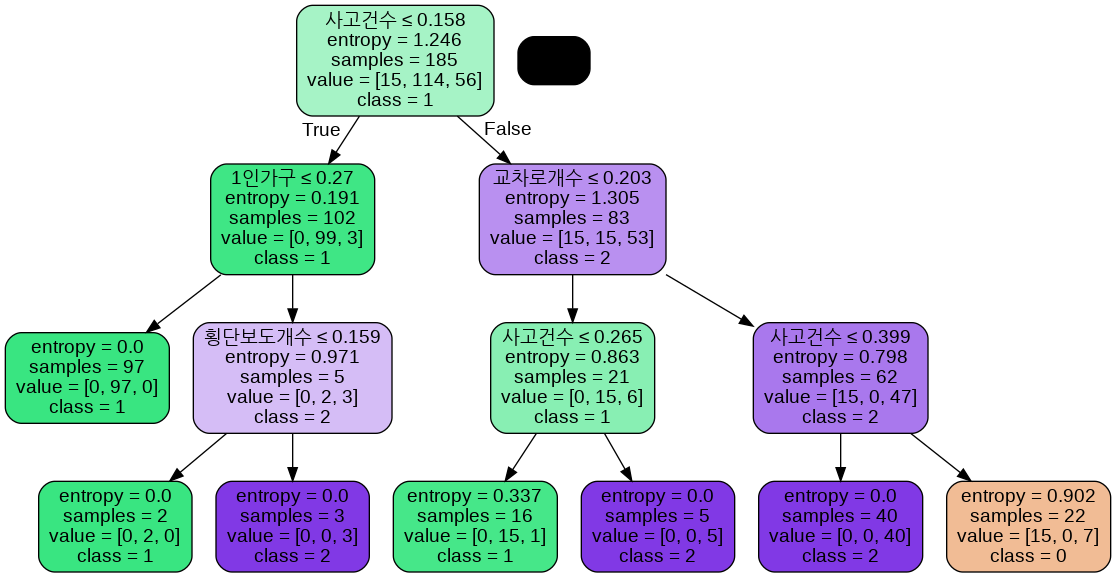

In [24]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

군집 0(15) : 사고건수 0.399 이상, 교차로개수 0.203 이상 -> 사고다발지역

군집 1(114) : 사고건수 0.158 이하, 1인가구 0.27 이하 -> 안전지역

군집 2(56) : 사고건수 0.158 이상 0.399이하, 교차로개수 0.203이상 -> 그 외 지역



In [28]:
res0 = pd.merge(data_cluster, data,on='자치구_동')
res = res0[['자치구_동','교차로개수_x','교차로개수_y','사고건수_x','사고건수_y','1인가구_x','1인가구_y','cluster']]
res

,자치구_동,교차로개수_x,교차로개수_y,사고건수_x,사고건수_y,1인가구_x,1인가구_y,cluster
0,강남구 개포동,0.182353,33,0.151261,54.0,0.140551,3888,1
1,강남구 논현동,0.194118,35,0.467787,167.0,0.455106,11739,2
2,강남구 대치동,0.329412,58,0.428571,153.0,0.242237,6426,2
3,강남구 도곡동,0.200000,36,0.221289,79.0,0.116191,3280,1
4,강남구 삼성동,0.241176,43,0.277311,99.0,0.211908,5669,2
...,...,...,...,...,...,...,...,...
180,중랑구 면목동,0.517647,90,0.941176,336.0,0.619135,15833,0
181,중랑구 묵동,0.258824,46,0.238095,85.0,0.256821,6790,2
182,중랑구 상봉동,0.123529,23,0.296919,106.0,0.292720,7686,2
183,중랑구 신내동,0.329412,58,0.162465,58.0,0.173044,4699,2


In [29]:
res_acc = res.sort_values(['사고건수_x']).reset_index()
res_acc[res_acc.사고건수_x<0.158]   # 56건 이하

,index,자치구_동,교차로개수_x,교차로개수_y,사고건수_x,사고건수_y,1인가구_x,1인가구_y,cluster
0,166,종로구 삼청동,0.041176,9,0.000000,0.0,0.000000,380,1
1,162,종로구 가회동,0.000000,2,0.000000,0.0,0.010056,631,1
2,163,종로구 무악동,0.011765,4,0.005602,2.0,0.004567,494,1
3,94,서초구 내곡동,0.158824,29,0.008403,3.0,0.048199,1583,1
4,175,중구 중림동,0.041176,9,0.011204,4.0,0.049962,1627,1
...,...,...,...,...,...,...,...,...,...
97,147,용산구 이태원동,0.094118,18,0.148459,53.0,0.119115,3353,1
98,0,강남구 개포동,0.182353,33,0.151261,54.0,0.140551,3888,1
99,92,서대문구 홍은동,0.194118,35,0.151261,54.0,0.237469,6307,1
100,101,성동구 마장동,0.117647,22,0.154062,55.0,0.131976,3674,1


In [30]:
res_acc[res_acc.사고건수_x<0.399]   #  군집 56건 이상 138건 이하

,index,자치구_동,교차로개수_x,교차로개수_y,사고건수_x,사고건수_y,1인가구_x,1인가구_y,cluster
0,166,종로구 삼청동,0.041176,9,0.000000,0.0,0.000000,380,1
1,162,종로구 가회동,0.000000,2,0.000000,0.0,0.010056,631,1
2,163,종로구 무악동,0.011765,4,0.005602,2.0,0.004567,494,1
3,94,서초구 내곡동,0.158824,29,0.008403,3.0,0.048199,1583,1
4,175,중구 중림동,0.041176,9,0.011204,4.0,0.049962,1627,1
...,...,...,...,...,...,...,...,...,...
157,136,영등포구 대림동,0.258824,46,0.347339,124.0,0.306182,8022,2
158,57,도봉구 창동,0.458824,80,0.350140,125.0,0.478064,12312,2
159,124,송파구 방이동,0.229412,41,0.358543,128.0,0.306182,8022,2
160,70,동작구 상도동,0.252941,45,0.383754,137.0,0.499419,12845,2


In [31]:
res_cross=res.sort_values(['교차로개수_x']).reset_index()
res_cross[res_cross.교차로개수_x>0.203]  # 37개 이상

,index,자치구_동,교차로개수_x,교차로개수_y,사고건수_x,사고건수_y,1인가구_x,1인가구_y,cluster
107,61,동대문구 전농동,0.205882,37,0.232493,83.0,0.285468,7505,2
108,109,성북구 길음동,0.205882,37,0.106443,38.0,0.120478,3387,1
109,78,마포구 서교동,0.205882,37,0.207283,74.0,0.312993,8192,2
110,79,마포구 성산동,0.205882,37,0.159664,57.0,0.393445,10200,2
111,53,노원구 하계동,0.205882,37,0.156863,56.0,0.174927,4746,1
...,...,...,...,...,...,...,...,...,...
180,42,구로구 구로동,0.735294,127,0.571429,204.0,0.846829,21516,0
181,132,양천구 목동,0.741176,128,0.434174,155.0,0.440282,11369,0
182,50,노원구 상계동,0.823529,142,0.761905,272.0,0.820065,20848,0
183,31,관악구 신림동,0.876471,151,1.000000,357.0,0.463240,11942,0


In [32]:
 # matplotlib 설정하기
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

#시각화 설정
from matplotlib import pyplot as plt

plt.style.use("ggplot")

In [33]:
res_0 = res[res.cluster ==0]  # 사고다발
res_1 = res[res.cluster ==1]  # 그 외
res_2 = res[res.cluster ==2]  # 안전지역

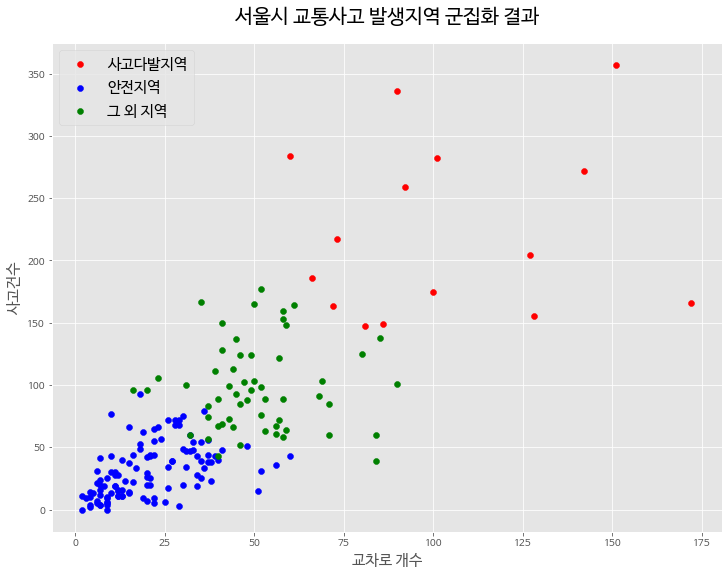

In [ ]:
# 교차로개수, 사고건수
plt.figure(figsize=(12,9))
plt.scatter(res_0['교차로개수_y'],res_0['사고건수_y'],color='red')
plt.scatter(res_1['교차로개수_y'],res_1['사고건수_y'],color='blue')
plt.scatter(res_2['교차로개수_y'],res_2['사고건수_y'],color='green')

plt.legend(['사고다발지역','안전지역','그 외 지역'], loc ="upper left",fontsize=15)
plt.title('서울시 교통사고 발생지역 군집화 결과',fontsize=20,pad=20)
plt.xlabel('교차로 개수',fontsize=15)
plt.ylabel('사고건수',fontsize=15)
plt.show()

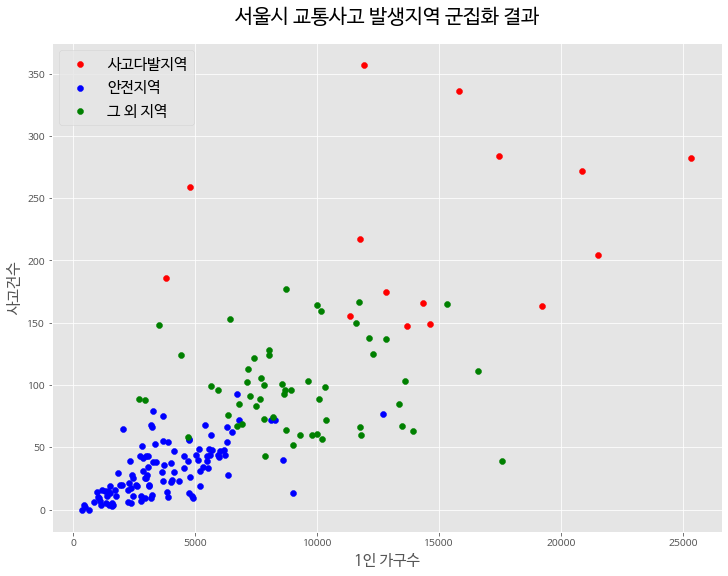

In [34]:
# 1인가구수, 사고건수
plt.figure(figsize=(12,9))
plt.scatter(res_0['1인가구_y'],res_0['사고건수_y'],color='red')
plt.scatter(res_1['1인가구_y'],res_1['사고건수_y'],color='blue')
plt.scatter(res_2['1인가구_y'],res_2['사고건수_y'],color='green')

plt.legend(['사고다발지역','안전지역','그 외 지역'], loc ="upper left",fontsize=15)
plt.title('서울시 교통사고 발생지역 군집화 결과',fontsize=20,pad=20)
plt.xlabel('1인 가구수',fontsize=15)
plt.ylabel('사고건수',fontsize=15)
plt.show()